# Framework Implementation

https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.3&regularizationRate=0&noise=0&networkShape=4,2&seed=0.95541&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

**Using TensorFlow/Keras**

- **Optimized:** They use highly optimized C++/CUDA code
- **Automatic differentiation:** They compute gradients automatically
- **GPU support:** Easy to run on GPUs
- **Pre-built layers:** Common layers are already implemented
- **Debugging tools:** Better error messages and visualization


In [11]:
import tensorflow as tf
from tensorflow import keras
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


### TensorFlow has two main APIs:

- **Sequential API:** For simple, linear layer stacks
- **Functional API:** For complex architectures with branches

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Generate a realistic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                          n_redundant=5, n_classes=2, random_state=42)

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scale the features - this is important!
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (800, 20)
Test set: (200, 20)


In [22]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(20,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

### A network with 64-32-16-1 architecture has:

- First layer: (20×64) + 64 = 1,344 parameters
- Second layer: (64×32) + 32 = 2,080 parameters
- Third layer: (32×16) + 16 = 528 parameters
- Output layer: (16×1) + 1 = 17 parameters

Total: 3,969 parameters

Each parameter will be learned during training!

In [24]:
# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

### Three key components:

- Optimizer: How we update weights (Adam is very popular)
- Loss function: What we're trying to minimize
- Metrics: What we want to track (accuracy for classification)

In [23]:
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6244 - loss: 0.6764 - val_accuracy: 0.7000 - val_loss: 0.6260
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7637 - loss: 0.5992 - val_accuracy: 0.8000 - val_loss: 0.5467
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8316 - loss: 0.4995 - val_accuracy: 0.8500 - val_loss: 0.4479
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8652 - loss: 0.4026 - val_accuracy: 0.8562 - val_loss: 0.3619
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9143 - loss: 0.2746 - val_accuracy: 0.8687 - val_loss: 0.3095
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9363 - loss: 0.2191 - val_accuracy: 0.8875 - val_loss: 0.2836
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9469 - loss: 0.1791 - val_accuracy: 0.9000 - val_loss: 0.2535
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9495 - loss: 0.1473 - val_accuracy: 0.9000 - val_loss

## Hyperparameter Impact & Visualization

**Key Hyperparameters**
```
Number of layers (depth)
Number of neurons per layer (width)
Choice of activation functions
Weight initialization strategies
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

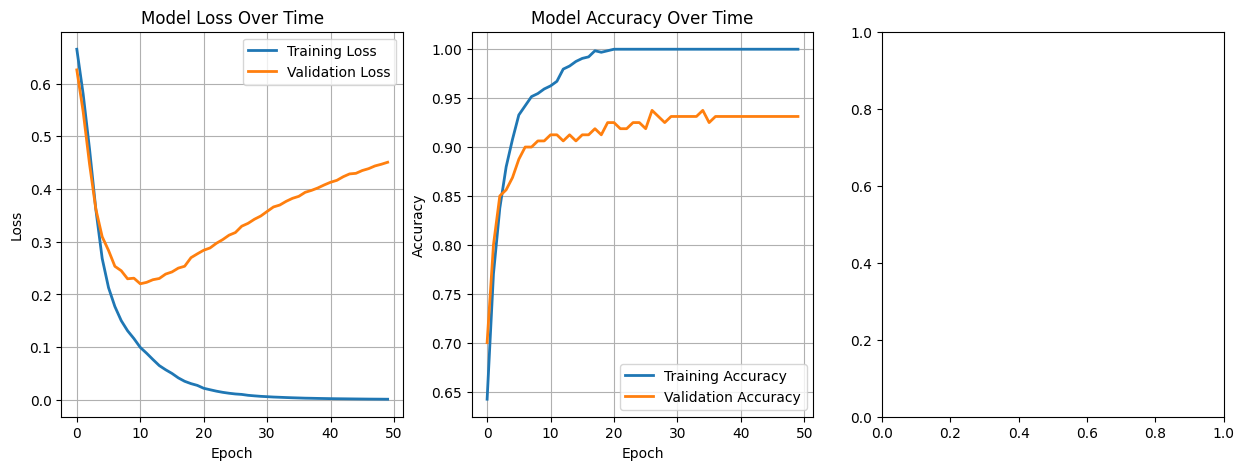

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)


In [27]:
# Test the final model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test) > 0.5

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

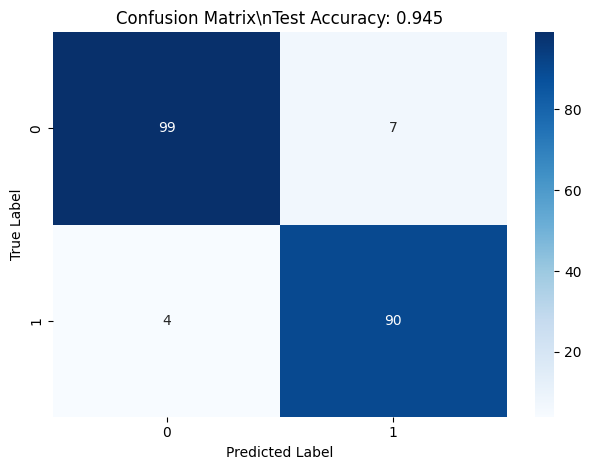

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix\\nTest Accuracy: {test_accuracy:.3f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [30]:
# Compare different architectures
architectures = [
    [20, 32, 1],           # Shallow network
    [20, 64, 32, 16, 1],   # Our network
    [20, 128, 64, 32, 16, 8, 1]  # Deeper network
]

In [31]:
results = []
for i, arch in enumerate(architectures):
    print(f"\\nTesting architecture {i+1}: {arch}")

    model_test = keras.Sequential()
    for j in range(len(arch)-1):
        if j == 0:
            model_test.add(keras.layers.Dense(arch[j+1], activation='relu' if j < len(arch)-2 else 'sigmoid', input_shape=(arch[j],)))
        else:
            model_test.add(keras.layers.Dense(arch[j+1], activation='relu' if j < len(arch)-2 else 'sigmoid'))

    model_test.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history_test = model_test.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    test_loss, test_acc = model_test.evaluate(X_test, y_test, verbose=0)
    results.append((arch, test_acc))
    print(f"Test accuracy: {test_acc:.3f}")

\nTesting architecture 1: [20, 32, 1]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 0.925
\nTesting architecture 2: [20, 64, 32, 16, 1]
Test accuracy: 0.950
\nTesting architecture 3: [20, 128, 64, 32, 16, 8, 1]
Test accuracy: 0.950


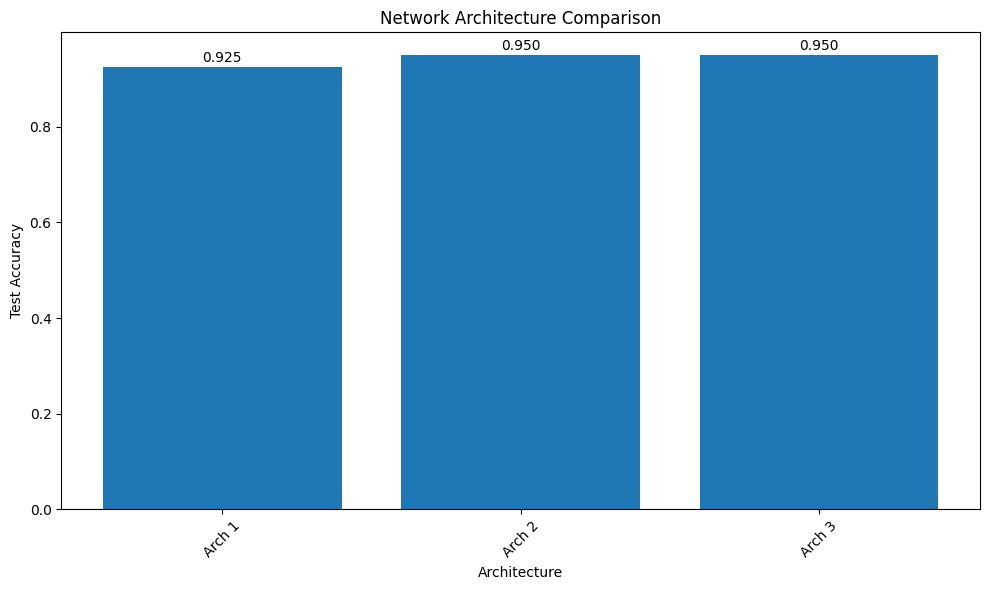

In [32]:
# Plot comparison
plt.figure(figsize=(10, 6))
architectures_str = [str(arch) for arch, _ in results]
accuracies = [acc for _, acc in results]
plt.bar(range(len(results)), accuracies)
plt.xlabel('Architecture')
plt.ylabel('Test Accuracy')
plt.title('Network Architecture Comparison')
plt.xticks(range(len(results)), [f"Arch {i+1}" for i in range(len(results))], rotation=45)
for i, (arch, acc) in enumerate(results):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center')
plt.tight_layout()
plt.show()

This shows that deeper isn't always better! The optimal architecture depends on your data and problem complexity."